# Correlation Analysis Different Types of Plots in R

In [ ]:
##https://rstudio-pubs-static.s3.amazonaws.com/240657_5157ff98e8204c358b2118fa69162e18.html

In [1]:
require(ggpubr)
require(tidyverse)
require(Hmisc)
require(corrplot)

Loading required package: ggpubr

Loading required package: ggplot2

Loading required package: tidyverse

-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v tibble  3.1.5     v dplyr   1.0.7
v tidyr   1.1.4     v stringr 1.4.0
v readr   2.0.2     v forcats 0.5.1
v purrr   0.3.4     

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Loading required package: Hmisc

Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: 'Hmisc'


The following objects are masked from 'package:dplyr':

    src, summarize


The following objects are masked from 'package:base':

    format.pval, units


Loading required package: corrplot

corrplot 0.91 loaded



In [2]:
head(mtcars)


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [3]:
library(ggpubr)

my_data <- mtcars
my_data$cyl <- factor(my_data$cyl)
str(my_data)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : Factor w/ 3 levels "4","6","8": 2 2 1 2 3 2 3 1 1 2 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


`geom_smooth()` using formula 'y ~ x'



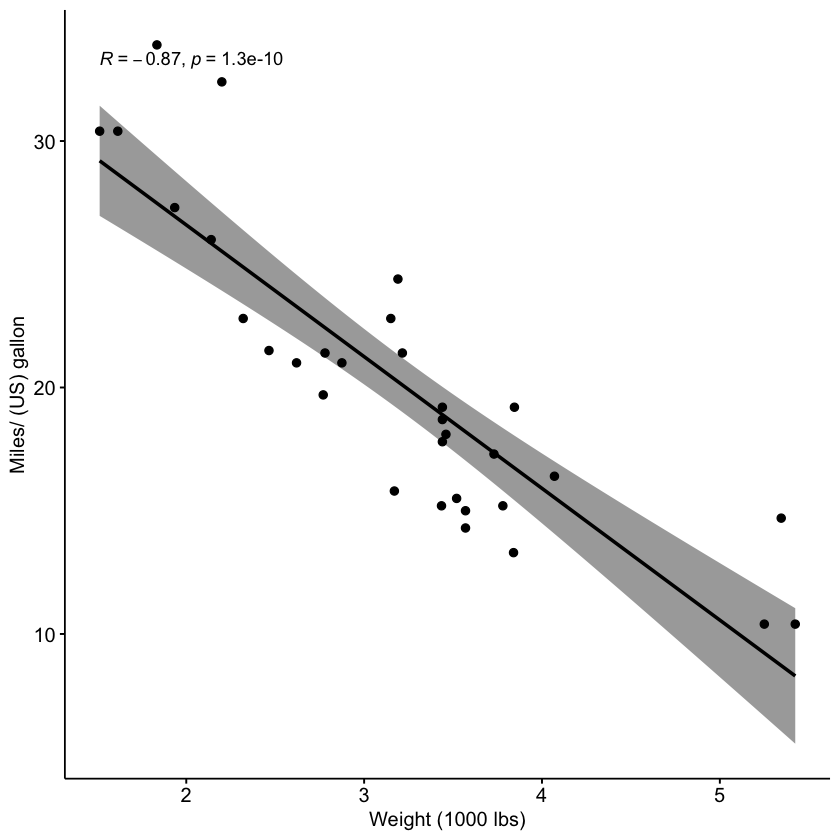

In [4]:
ggscatter(my_data, x = "wt", y = "mpg",
          add = "reg.line", conf.int = TRUE,
          cor.coef = TRUE, cor.method = "pearson",
          xlab = "Weight (1000 lbs)", ylab = "Miles/ (US) gallon")

In [5]:
# Shapiro-Wilk normality test for mpg
shapiro.test(my_data$mpg) # => p = 0.1229


	Shapiro-Wilk normality test

data:  my_data$mpg
W = 0.94756, p-value = 0.1229


In [6]:
# Shapiro-Wilk normality test for wt
shapiro.test(my_data$wt) # => p = 0.09


	Shapiro-Wilk normality test

data:  my_data$wt
W = 0.94326, p-value = 0.09265


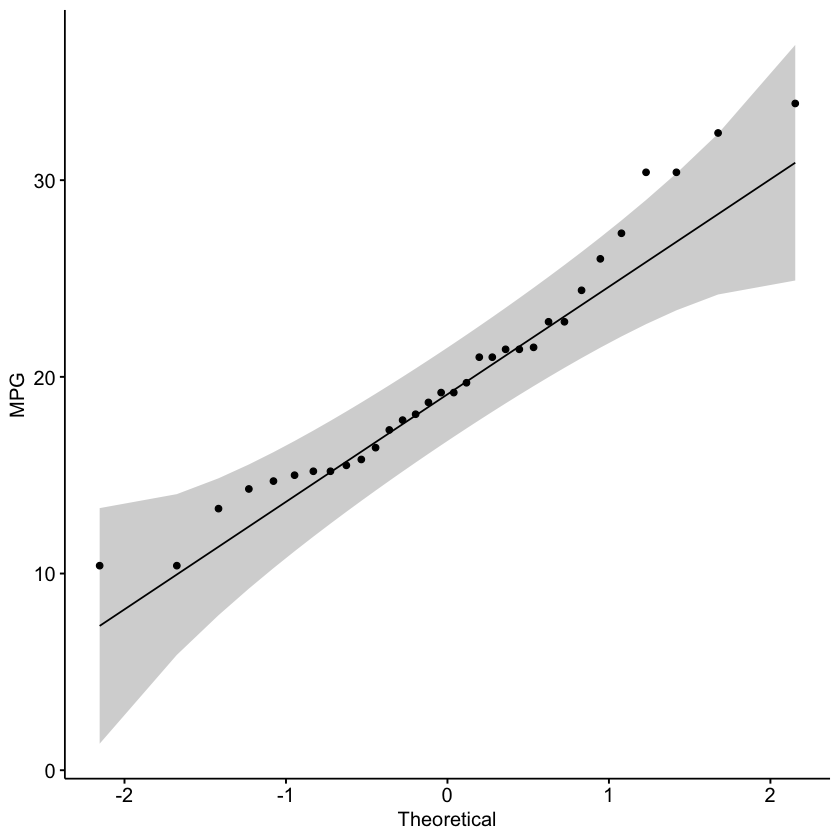

In [7]:
library("ggpubr")
# Check for the normality of "mpg""
ggqqplot(my_data$mpg, ylab = "MPG")

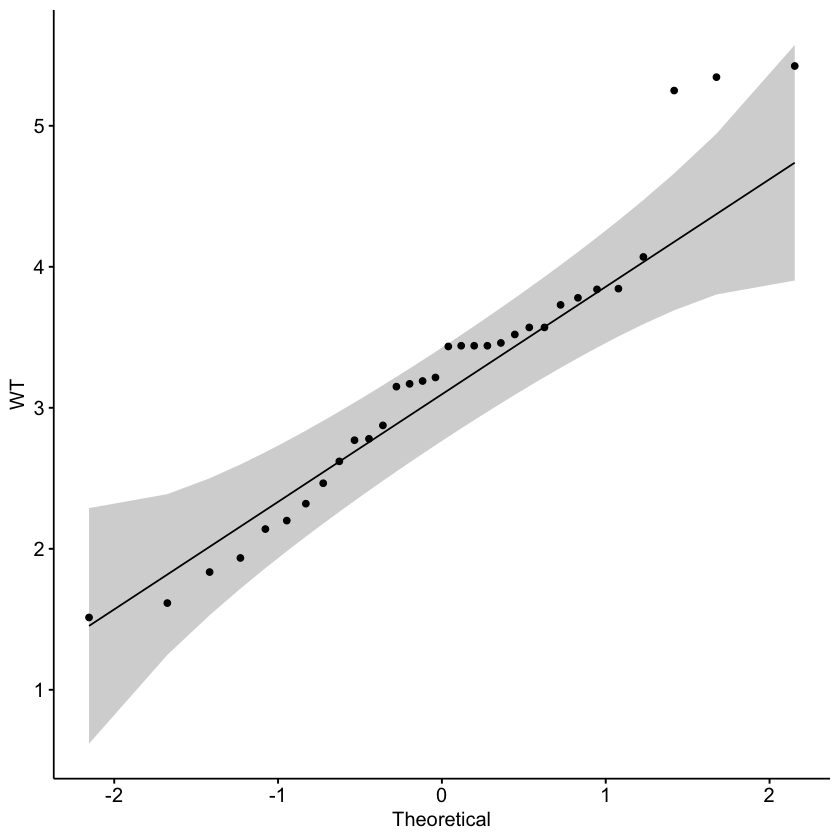

In [8]:
# Check for the normality of "wt""
ggqqplot(my_data$wt, ylab = "WT")

In [9]:
res <- cor.test(my_data$wt, my_data$mpg, method = "pearson")


In [10]:
res


	Pearson's product-moment correlation

data:  my_data$wt and my_data$mpg
t = -9.559, df = 30, p-value = 1.294e-10
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9338264 -0.7440872
sample estimates:
       cor 
-0.8676594 


In [11]:
# Extract the p.value
res$p.value

[1] 1.293959e-10

In [12]:
# Extract the correlation coefficient
res$estimate

cor 
-0.8676594

In [13]:
res2 <- cor.test(my_data$mpg, my_data$wt, method = "kendall")


Warning message in cor.test.default(my_data$mpg, my_data$wt, method = "kendall"):
"Cannot compute exact p-value with ties"


In [14]:
res2


	Kendall's rank correlation tau

data:  my_data$mpg and my_data$wt
z = -5.7981, p-value = 6.706e-09
alternative hypothesis: true tau is not equal to 0
sample estimates:
       tau 
-0.7278321 


In [15]:
res3 <- cor.test(my_data$wt, my_data$mpg, method = "spearman")


Warning message in cor.test.default(my_data$wt, my_data$mpg, method = "spearman"):
"Cannot compute exact p-value with ties"


In [16]:
res3


	Spearman's rank correlation rho

data:  my_data$wt and my_data$mpg
S = 10292, p-value = 1.488e-11
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
-0.886422 


In [17]:
library(dplyr)

my_data <- select(mtcars, mpg, disp, hp, drat, wt, qsec)
head(my_data)

,mpg,disp,hp,drat,wt,qsec
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,160,110,3.90,2.620,16.46
Mazda RX4 Wag,21.0,160,110,3.90,2.875,17.02
Datsun 710,22.8,108,93,3.85,2.320,18.61
Hornet 4 Drive,21.4,258,110,3.08,3.215,19.44
Hornet Sportabout,18.7,360,175,3.15,3.440,17.02
Valiant,18.1,225,105,2.76,3.460,20.22


In [18]:
#Let's compute the correlation matrix
cor_1 <- round(cor(my_data), 2)
cor_1

,mpg,disp,hp,drat,wt,qsec
mpg,1.00,-0.85,-0.78,0.68,-0.87,0.42
disp,-0.85,1.00,0.79,-0.71,0.89,-0.43
hp,-0.78,0.79,1.00,-0.45,0.66,-0.71
drat,0.68,-0.71,-0.45,1.00,-0.71,0.09
wt,-0.87,0.89,0.66,-0.71,1.00,-0.17
qsec,0.42,-0.43,-0.71,0.09,-0.17,1.00


In [19]:
library("Hmisc")

cor_2 <- rcorr(as.matrix(my_data))
cor_2

       mpg  disp    hp  drat    wt  qsec
mpg   1.00 -0.85 -0.78  0.68 -0.87  0.42
disp -0.85  1.00  0.79 -0.71  0.89 -0.43
hp   -0.78  0.79  1.00 -0.45  0.66 -0.71
drat  0.68 -0.71 -0.45  1.00 -0.71  0.09
wt   -0.87  0.89  0.66 -0.71  1.00 -0.17
qsec  0.42 -0.43 -0.71  0.09 -0.17  1.00

n= 32 


P
     mpg    disp   hp     drat   wt     qsec  
mpg         0.0000 0.0000 0.0000 0.0000 0.0171
disp 0.0000        0.0000 0.0000 0.0000 0.0131
hp   0.0000 0.0000        0.0100 0.0000 0.0000
drat 0.0000 0.0000 0.0100        0.0000 0.6196
wt   0.0000 0.0000 0.0000 0.0000        0.3389
qsec 0.0171 0.0131 0.0000 0.6196 0.3389       

In [20]:
# As you can see "cor_2" is a list so extracting these values is quite simple...

# p-values
cor_2$P

,mpg,disp,hp,drat,wt,qsec
mpg,NA,9.380328e-10,1.787835e-07,1.776240e-05,1.293958e-10,1.708199e-02
disp,9.380328e-10,NA,7.142679e-08,5.282022e-06,1.222311e-11,1.314404e-02
hp,1.787835e-07,7.142679e-08,NA,9.988772e-03,4.145827e-05,5.766253e-06
drat,1.776240e-05,5.282022e-06,9.988772e-03,NA,4.784260e-06,6.195826e-01
wt,1.293958e-10,1.222311e-11,4.145827e-05,4.784260e-06,NA,3.388683e-01
qsec,1.708199e-02,1.314404e-02,5.766253e-06,6.195826e-01,3.388683e-01,NA


In [21]:
# Correlation matrix
cor_2$r

,mpg,disp,hp,drat,wt,qsec
mpg,1.0000000,-0.8475514,-0.7761684,0.68117191,-0.8676594,0.41868403
disp,-0.8475514,1.0000000,0.7909486,-0.71021393,0.8879799,-0.43369788
hp,-0.7761684,0.7909486,1.0000000,-0.44875912,0.6587479,-0.70822339
drat,0.6811719,-0.7102139,-0.4487591,1.00000000,-0.7124406,0.09120476
wt,-0.8676594,0.8879799,0.6587479,-0.71244065,1.0000000,-0.17471588
qsec,0.4186840,-0.4336979,-0.7082234,0.09120476,-0.1747159,1.00000000


In [22]:
flat_cor_mat <- function(cor_r, cor_p){
  #This function provides a simple formatting of a correlation matrix
  #into a table with 4 columns containing :
    # Column 1 : row names (variable 1 for the correlation test)
    # Column 2 : column names (variable 2 for the correlation test)
    # Column 3 : the correlation coefficients
    # Column 4 : the p-values of the correlations
  library(tidyr)
  library(tibble)
  cor_r <- rownames_to_column(as.data.frame(cor_r), var = "row")
  cor_r <- gather(cor_r, column, cor, -1)
  cor_p <- rownames_to_column(as.data.frame(cor_p), var = "row")
  cor_p <- gather(cor_p, column, p, -1)
  cor_p_matrix <- left_join(cor_r, cor_p, by = c("row", "column"))
  cor_p_matrix
}

cor_3 <- rcorr(as.matrix(mtcars[, 1:7]))

my_cor_matrix <- flat_cor_mat(cor_3$r, cor_3$P)
head(my_cor_matrix)

,row,column,cor,p
,<chr>,<chr>,<dbl>,<dbl>
1,mpg,mpg,1.0000000,NA
2,cyl,mpg,-0.8521620,6.112688e-10
3,disp,mpg,-0.8475514,9.380328e-10
4,hp,mpg,-0.7761684,1.787835e-07
5,drat,mpg,0.6811719,1.776240e-05
6,wt,mpg,-0.8676594,1.293958e-10


In [23]:
M<-cor(mtcars)
head(round(M,2))

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.00,-0.85,-0.85,-0.78,0.68,-0.87,0.42,0.66,0.60,0.48,-0.55
cyl,-0.85,1.00,0.90,0.83,-0.70,0.78,-0.59,-0.81,-0.52,-0.49,0.53
disp,-0.85,0.90,1.00,0.79,-0.71,0.89,-0.43,-0.71,-0.59,-0.56,0.39
hp,-0.78,0.83,0.79,1.00,-0.45,0.66,-0.71,-0.72,-0.24,-0.13,0.75
drat,0.68,-0.70,-0.71,-0.45,1.00,-0.71,0.09,0.44,0.71,0.70,-0.09
wt,-0.87,0.78,0.89,0.66,-0.71,1.00,-0.17,-0.55,-0.69,-0.58,0.43


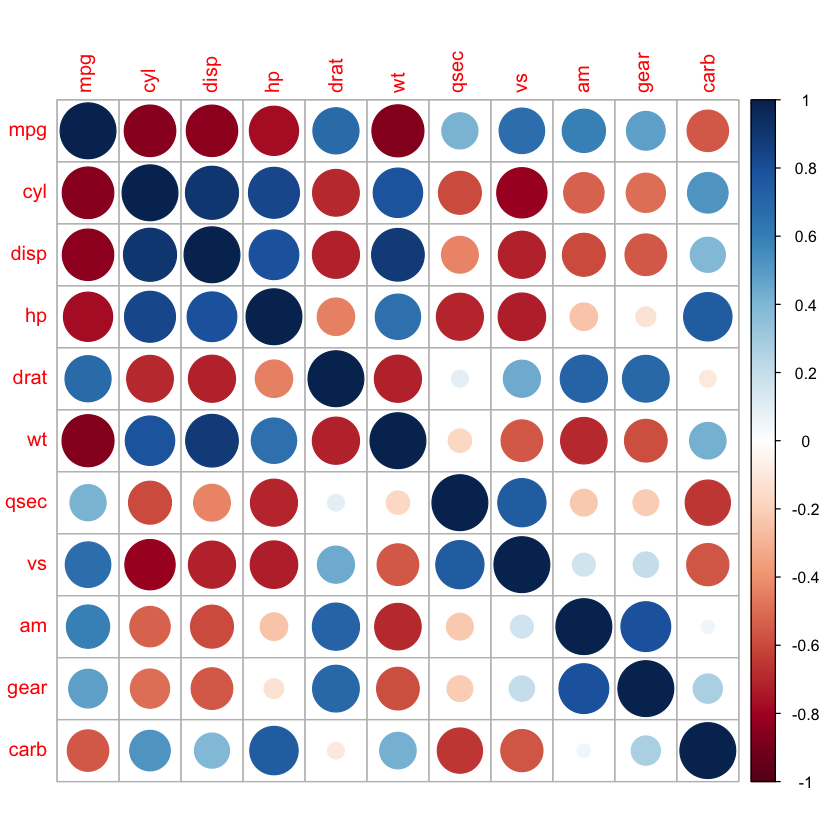

In [24]:
#Visualize the correlation matrix

# method = "circle""
corrplot(M, method = "circle")

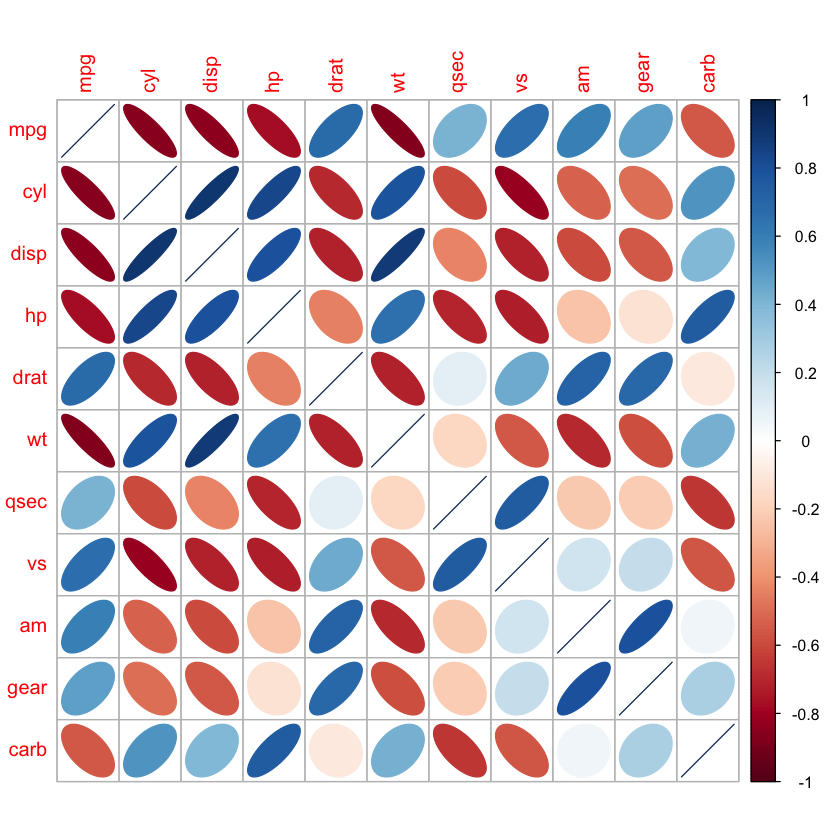

In [25]:
# method = "ellipse""
corrplot(M, method = "ellipse")

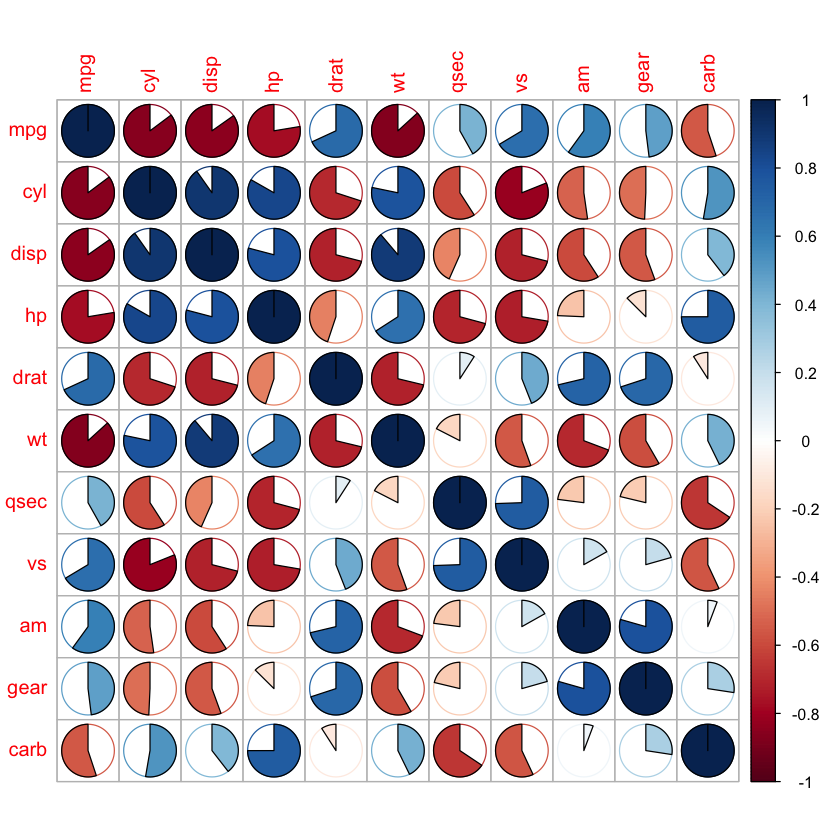

In [26]:
# method = "pie"
corrplot(M, method = "pie")

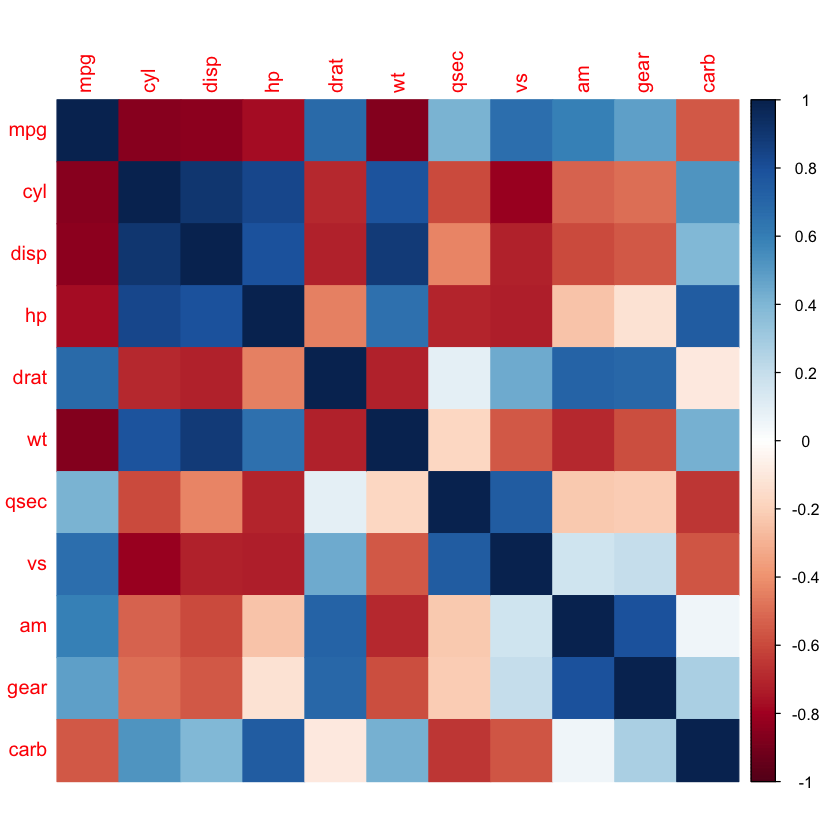

In [27]:
# method = "color"
corrplot(M, method = "color")

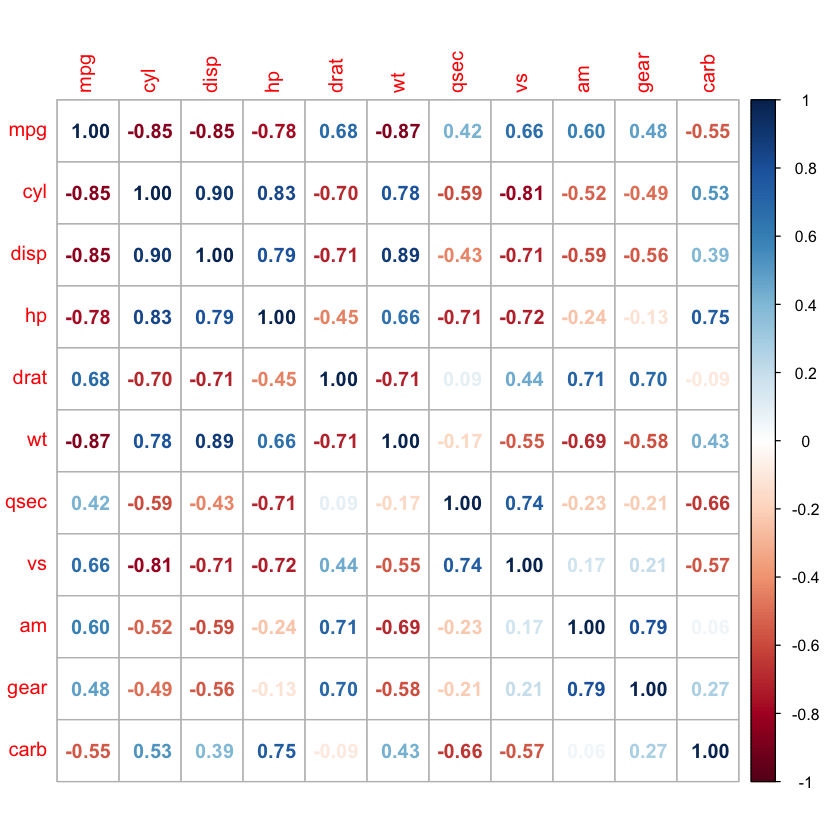

In [28]:
corrplot(M, method = "number")

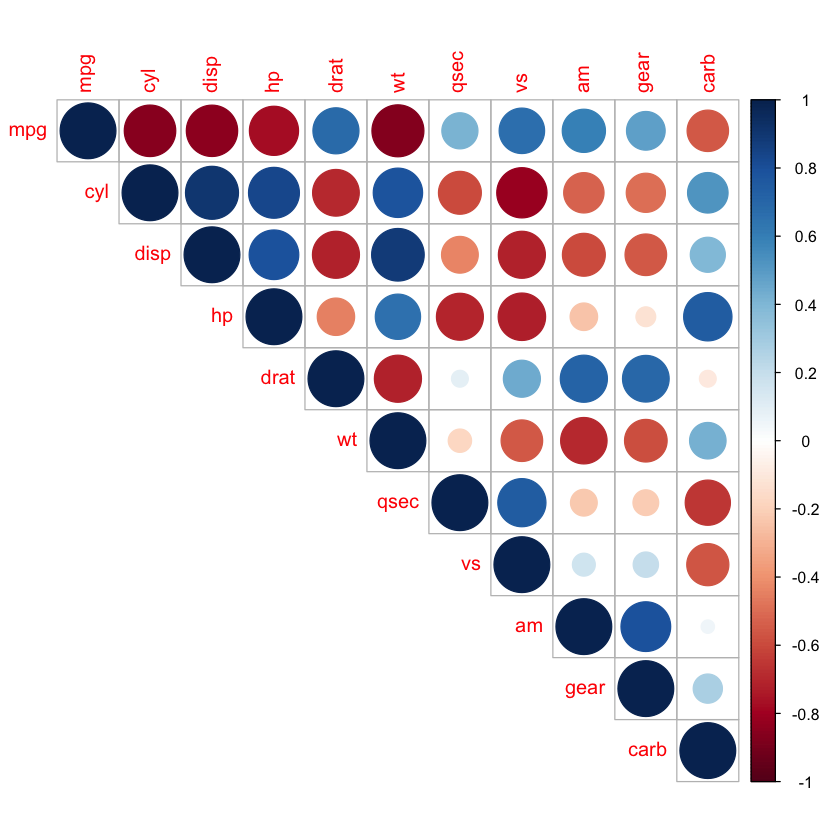

In [29]:
# upper triangular
corrplot(M, type = "upper")

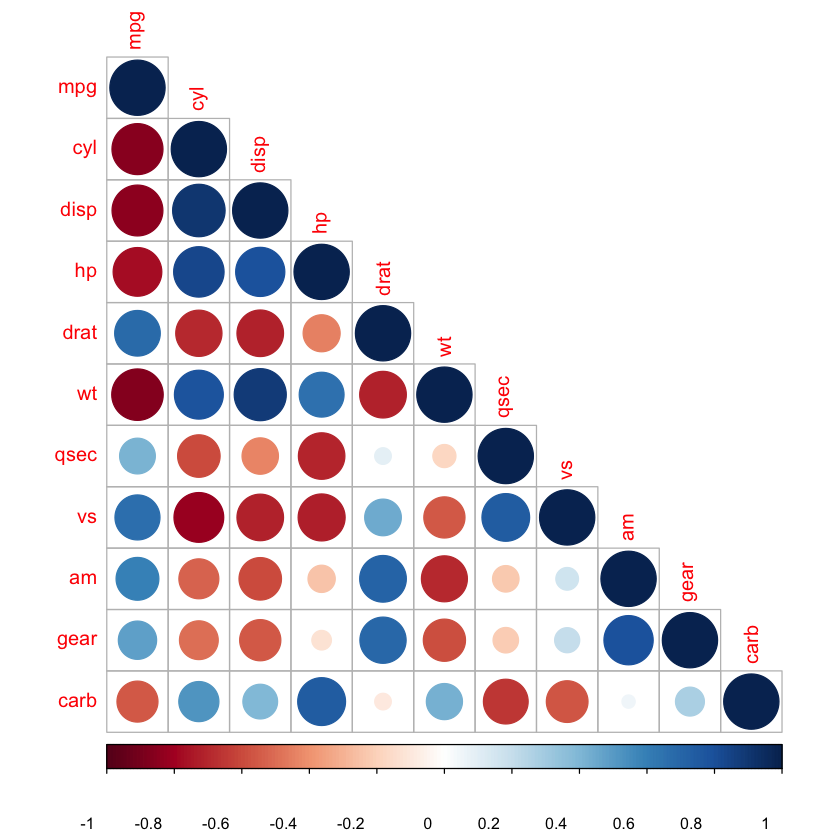

In [30]:
#lower triangular
corrplot(M, type = "lower")

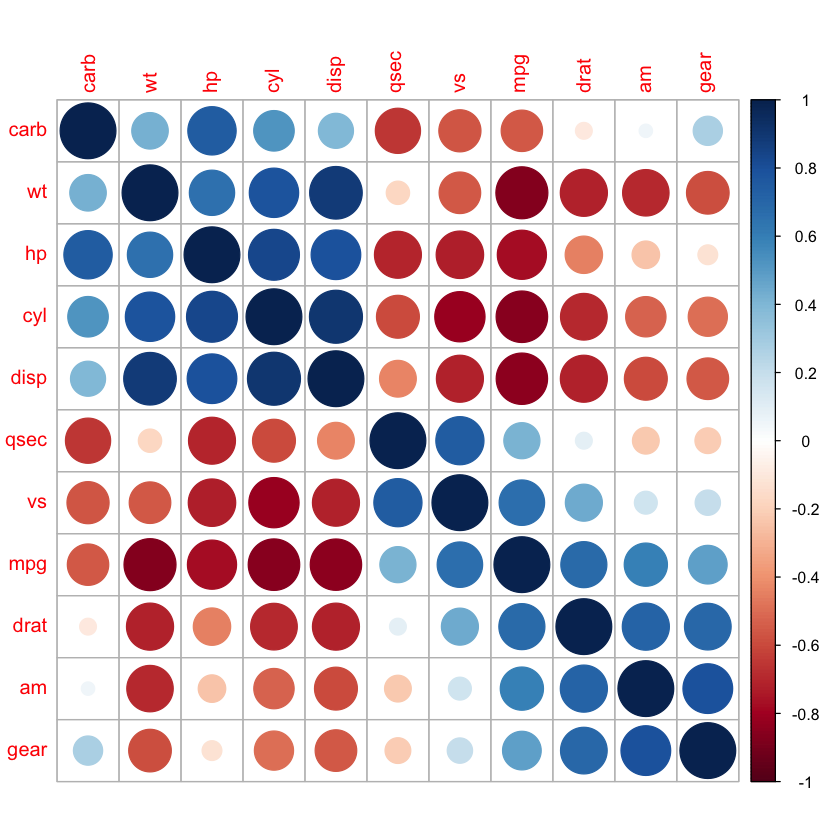

In [31]:
# correlogram with hclust reordering
corrplot(M, order = "hclust")

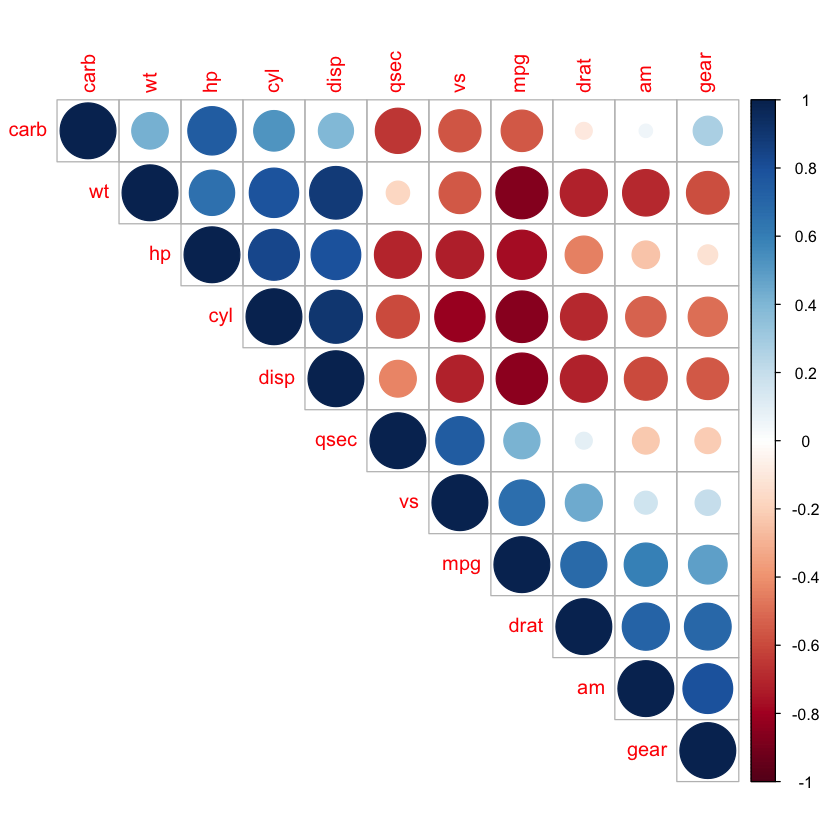

In [32]:
# or exploit the symetry of the correlation matrix 
# correlogram with hclust reordering
corrplot(M, type = "upper", order = "hclust")

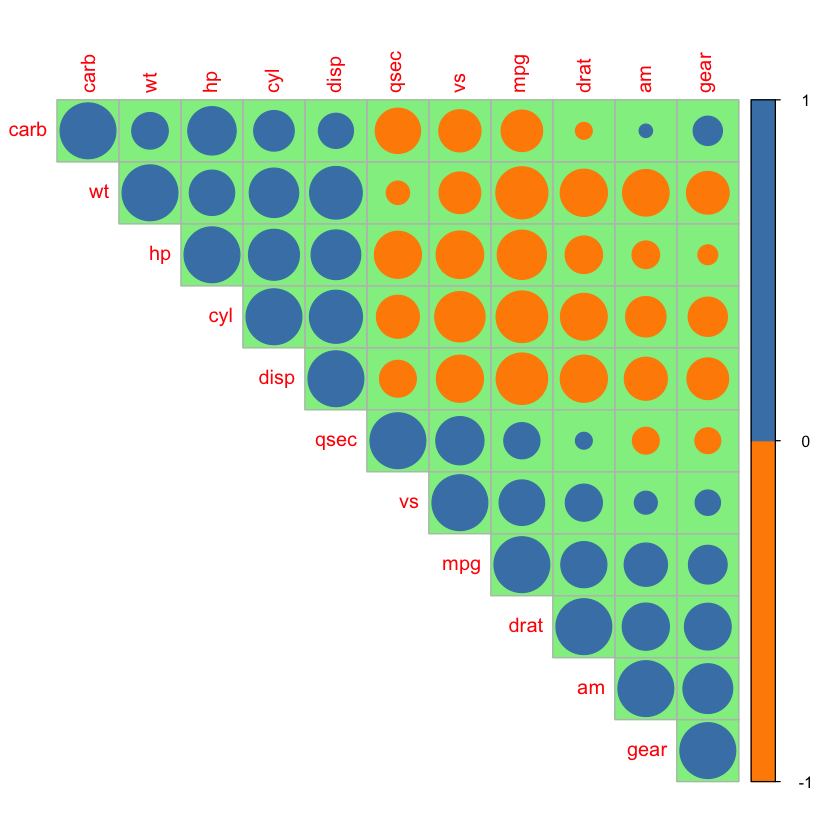

In [33]:
# Change background color to lightgreen and color of the circles to darkorange and steel blue
corrplot(M, type = "upper", order = "hclust", col = c("darkorange", "steelblue"),
         bg = "lightgreen")

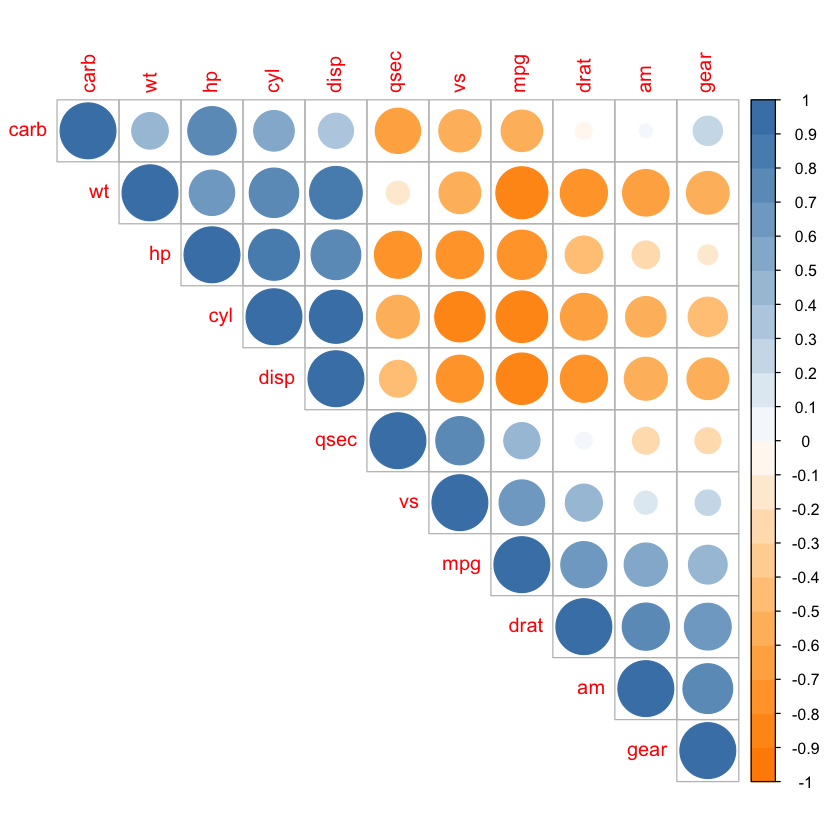

In [34]:
# use "colorRampPallete" to obtain contionus color scales
col <- colorRampPalette(c("darkorange", "white", "steelblue"))(20)
corrplot(M, type = "upper", order = "hclust", col = col)

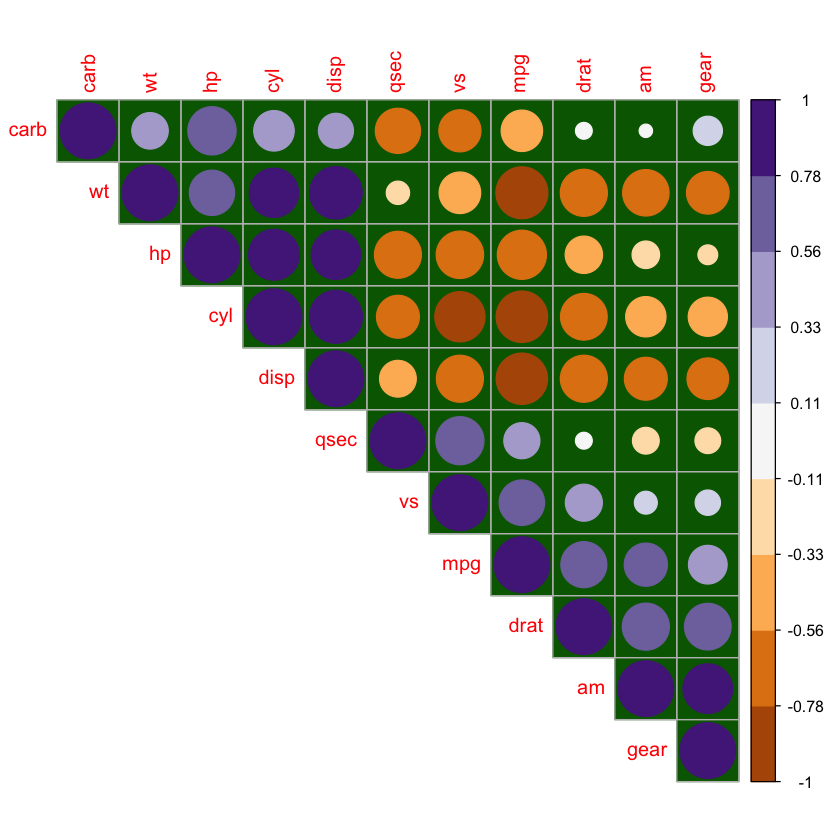

In [35]:
# Or use "RColorBrewer" package
library(RColorBrewer)
corrplot(M, type = "upper", order = "hclust",
         col = brewer.pal(n = 9, name = "PuOr"), bg = "darkgreen")

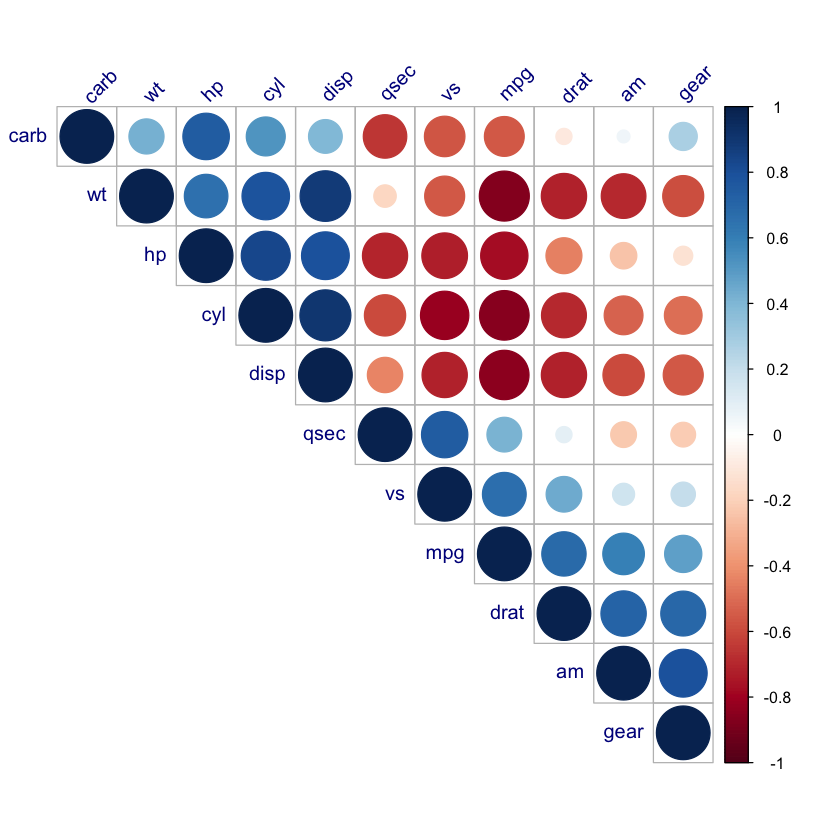

In [36]:
corrplot(M, type = "upper", order = "hclust", tl.col = "darkblue", tl.srt = 45)


ERROR: Error in data.frame(..., check.names = FALSE): arguments imply differing number of rows: 66, 55


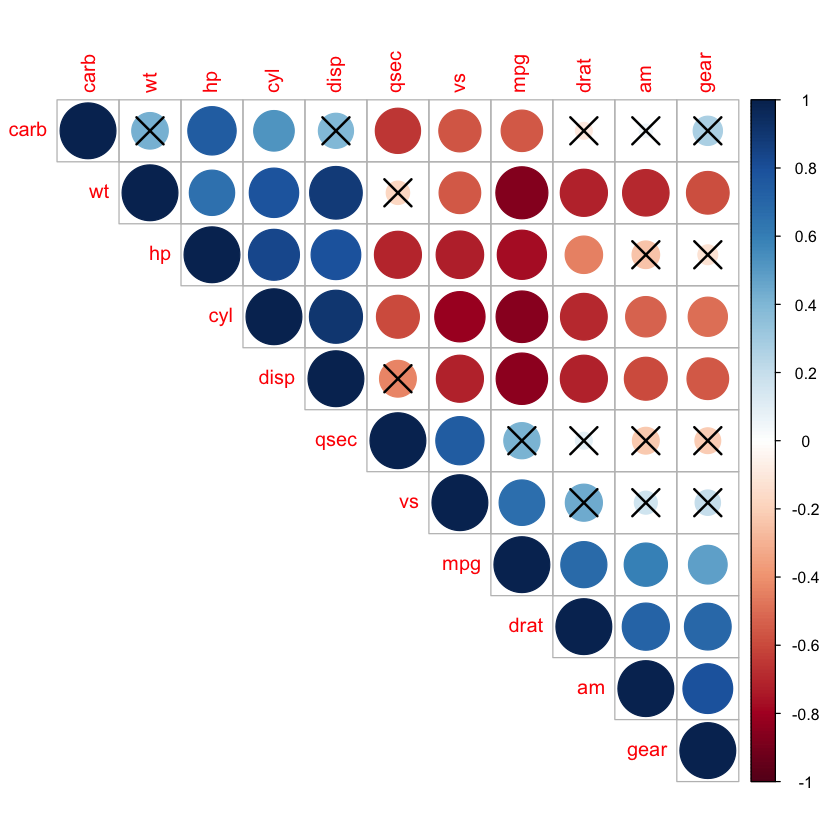

In [37]:
# Mark the insignificant coefficients according to the specified p-value significance level
cor_5 <- rcorr(as.matrix(mtcars))
M <- cor_5$r
p_mat <- cor_5$P
corrplot(M, type = "upper", order = "hclust", 
         p.mat = p_mat, sig.level = 0.01)

ERROR: Error in data.frame(..., check.names = FALSE): arguments imply differing number of rows: 66, 55


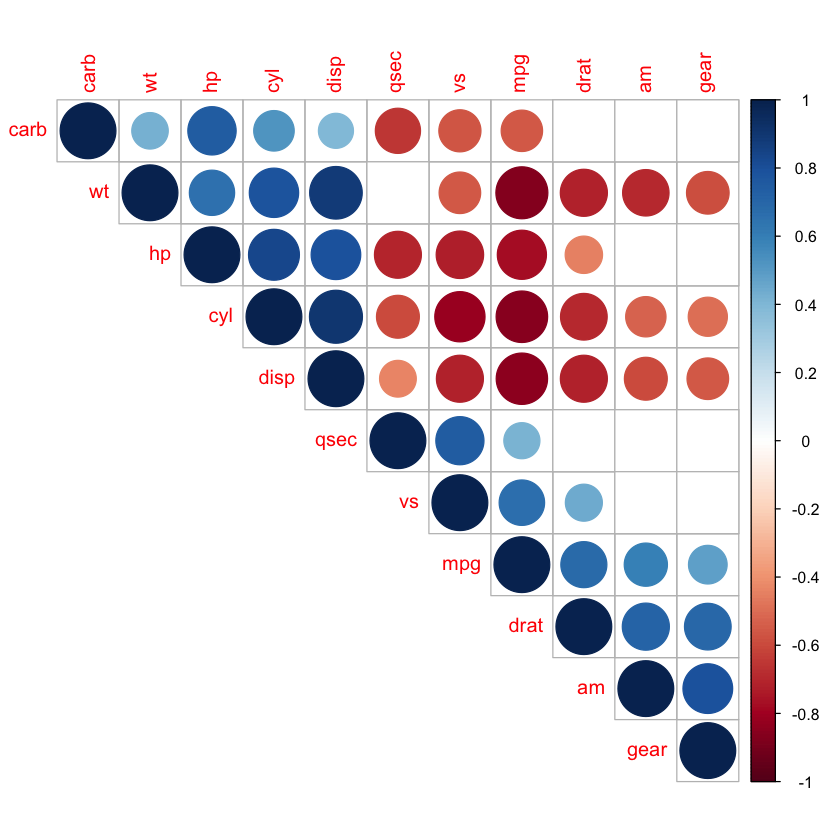

In [38]:
# Leave blank on no significant coefficient
corrplot(M, type = "upper", order = "hclust", 
         p.mat = p_mat, sig.level = 0.05, insig = "blank")

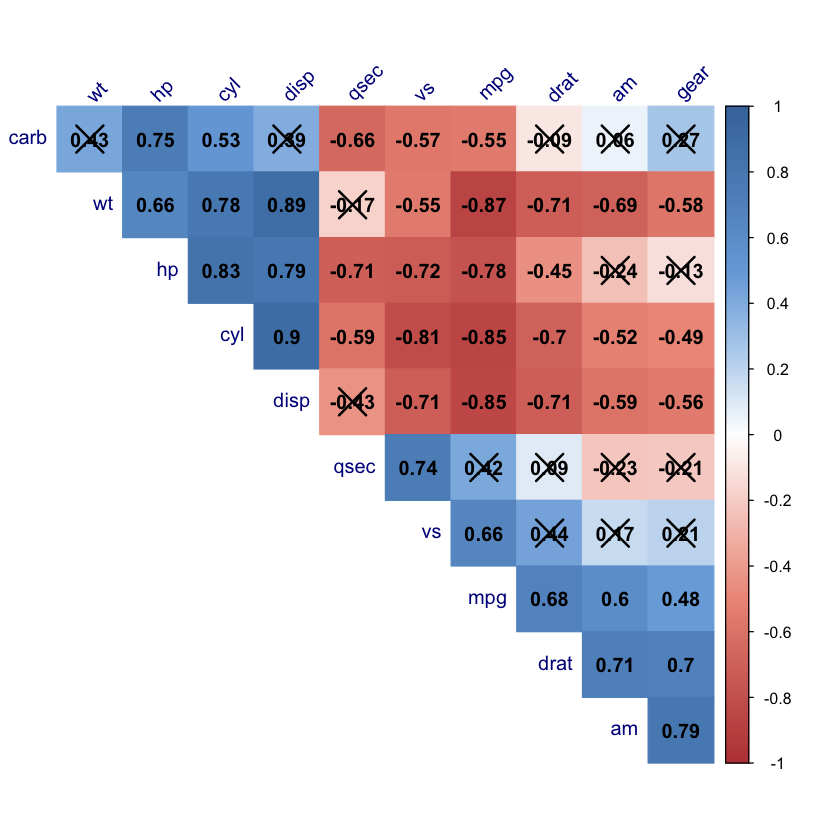

In [39]:
col <- colorRampPalette(c("#BB4444", "#EE9988", "#FFFFFF", "#77AADD", "#4477AA"))
corrplot(M, method = "color", col = col(200),  
         type = "upper", order = "hclust", 
         addCoef.col = "black", # Add coefficient of correlation
         tl.col = "darkblue", tl.srt = 45, #Text label color and rotation
         # Combine with significance level
         p.mat = p_mat, sig.level = 0.01,  
         # hide correlation coefficient on the principal diagonal
         diag = FALSE 
         )

In [44]:
#library("PerformanceAnalytics")


In [45]:
library("PerformanceAnalytics")
install.packages("PerformanceAnalytics")

Loading required package: xts

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



Attaching package: 'xts'


The following objects are masked from 'package:dplyr':

    first, last



Attaching package: 'PerformanceAnalytics'


The following object is masked from 'package:graphics':

    legend





The downloaded binary packages are in
	/var/folders/3f/6pzn2nyn32d7wthyxkzsqyxcdrtvym/T//RtmpLFG2iM/downloaded_packages


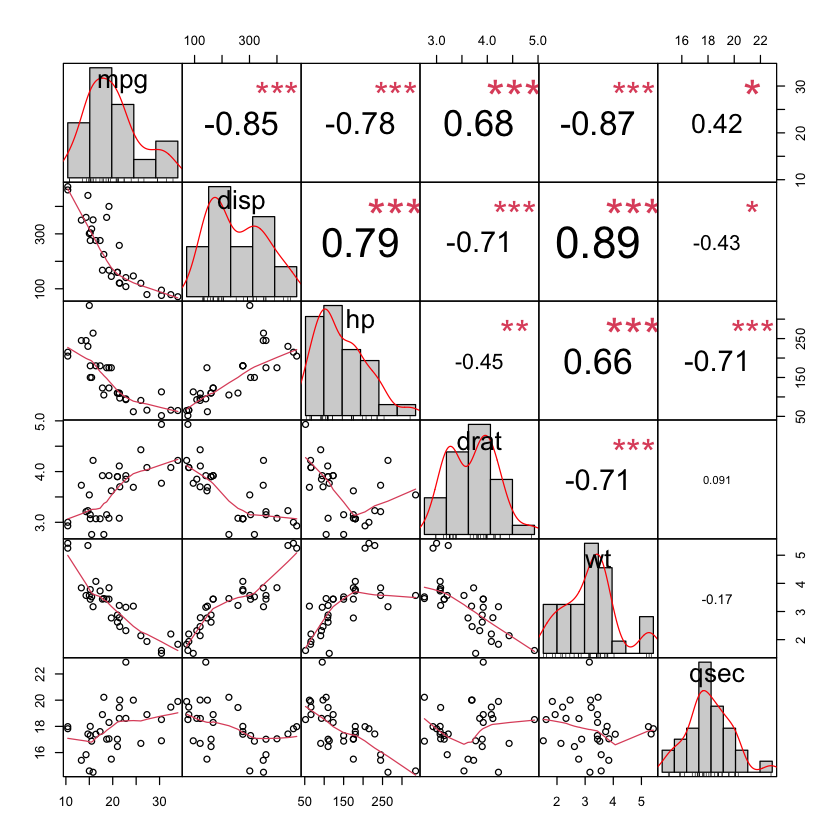

In [46]:
my_data <- mtcars[, c(1,3,4,5,6,7)]
chart.Correlation(my_data, histogram = TRUE, pch = 19)

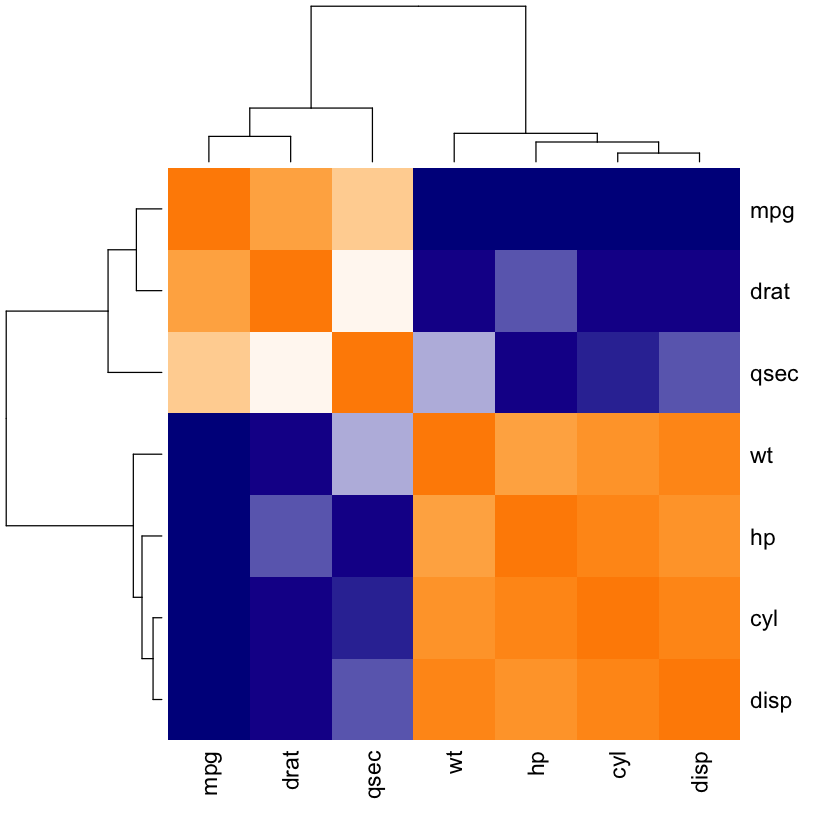

In [43]:
# Get some colors
col <- colorRampPalette(c("darkblue", "white", "darkorange"))(20)
M <- cor(mtcars[1:7])
heatmap(x = M, col = col, symm = TRUE)